# Statistical testing for data analysis: a practical guide

<p><a name="sections"></a></p>


# Sections

- <a href="#goal">Goal</a>
- <a href="#cat">Categorical vs categorical variables</a>
    - <a href="#chi">Chi-square test</a>
- <a href="#cont">Continous vs continous variables</a>
    - <a href="#pear">Pearson's correlation</a>
    - <a href="#spear">Spearman's correlation</a>

Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as ss
from statsmodels.sandbox.stats.multicomp import multipletests 
from itertools import combinations 

sns.set_theme(style = 'ticks')

<p><a name="goal"></a></p>

## Goal
#### Describe how the characteristics of each patient (e.g., age, sex, and cholesterol levels) affect the metrics of heart function.


Luckily you have access to a Heart Database to do data analysis. Below we describe features included in such database:


- age: Age of the patient

- sex: Sex of the patient

- ex_induced_angina: exercise induced angina (1 = yes; 0 = no)

- major_vessels: number of major vessels colored by fluoroscopy (0-3)

- chestpain: Chest Pain type chest pain type
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic
- blood_pressure: resting blood pressure (in mm Hg)

- cholesterol: cholesterol in mg/dl fetched via BMI sensor

- blood_sugar: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- electrcg_results: resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- max_heart_rate: maximum heart rate achieved
- oldpeak: ST depression induced by exercise relative to rest

- chance_heartattack:   0= less chance of heart attack 1= more chance of heart attack

[Source](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

In [2]:
df = pd.read_csv('https://nycdsaslides.s3.amazonaws.com/LLS/heart.csv',
                 names = ['age','sex','chestpain', 'blood_pressure',\
                          'cholesterol','blood_sugar','electrcg_results',\
                          'max_heart_rate','ex_induced_angina','oldpeak',\
                          'slp','major_vessels','thall','chance_heartattack'], header = 0)

Based on medical evidence, the likelihood of having a heart attack increases after age 45. So let's make a new categorical feature to account for two age groups:

In [3]:
df.loc[(df['age'] <= 45), 'age_group'] = 'under45'
df.loc[(df['age'] > 45), 'age_group'] = 'over45'

In [4]:
df.head()

,age,sex,chestpain,blood_pressure,cholesterol,blood_sugar,electrcg_results,max_heart_rate,ex_induced_angina,oldpeak,slp,major_vessels,thall,chance_heartattack,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,over45
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,under45
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,under45
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,over45
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,over45


<p><a name="cat"></a></p>

## 2. Categorical vs categorical variables


**Question 1** : how does the age group affect the insidence of exercise induced angina?

First, we should present the data in a simple cross tabulation 

In [5]:
table  = pd.crosstab(df['age_group'], df['ex_induced_angina'])
table.columns = ['yes','no']
table

,yes,no
age_group,,
over45,155,84
under45,49,15


<p><a name="chi"></a></p>

## Chi-square test

This is a [test](https://www.statisticshowto.com/probability-and-statistics/chi-square/) for independence that compares two variables in a contingency table to see if they are related. In other words, it tests whether distributions of categorical variables differ from each another.

-   $H_0:$ The proportion of patients who have exercise-induced angina is independent of the age group
-   $H_1:$ The proportion of patients who have exercise-induced angina depends on the age group


$$\chi^2 = \sum \frac {(O - E)^2}{E}$$

*O* observed and *E* expected frequencies

The [Yate's correction](https://en.wikipedia.org/wiki/Yates%27s_correction_for_continuity#:~:text=To%20reduce%20the%20error%20in,2%20%C3%97%202%20contingency%20table.) is used when at least one cell of the table has an expected count smaller than 5

| Observed | Yes | No | Total |  |  |  |  |  |  |  |  |  |  |  |  | Expected | Yes    | No    | Total |
|----------|-----|----|-------|--|--|--|--|--|--|--|--|--|--|--|--|----------|--------|-------|-------|
| over45   | 155 | 84 | 239   |  |  |  |  |  |  |  |  |  |  |  |  | over45   | 160.91 | 78.09 | 239   |
| under45  | 49  | 15 | 64    |  |  |  |  |  |  |  |  |  |  |  |  | under45  | 43.09  | 20.91 | 64    |
| **Total**   | 204 | 99 | 303   |  |  |  |  |  |  |  |  |  |  |  |  | **Total**   | 204    | 99    | 303   |

*Expected frequency = row total * column total / grand total* 

In [6]:
chi2, p_value, dof, expected = ss.chi2_contingency(table, correction = False)

In [7]:
expected

array([[160.91089109,  78.08910891],
       [ 43.08910891,  20.91089109]])

In [8]:
p_value

0.07610257006621984

Since the p-value is > 0.05 que can confidently accpet the null hypothesis that the proportion of patients who have exercise induced angina is independent of the age group

---------
---------

**Question 2** : does the number of major vessels observed by fluorometry depend on the age group?

Again, we should present the data in a cross tabulation 

In [9]:
table2  = pd.crosstab(df['major_vessels'], df['age_group'])
table2

age_group,over45,under45
major_vessels,,
0,121,54
1,60,5
2,37,1
3,19,1
4,2,3


In [10]:
chi2_2, p_value_2, dof_2, ex_2 = ss.chi2_contingency(table2, correction = True)

In [11]:
p_value_2

1.5511561573947614e-06

Since the p-value is < 0.05 we can confidently reject the null hypothesis and state that the number of major vessels observed by fluorometry does vary depending on the age group.

We're left with the follow-up question of **which groups are significantly different?**




As we did in part 1 of "Statistical testing for data analysis", we can proceed to do pairwise comparisons. However, we need to correct the p-values to control for experimentwise type I error.

One way to do this is to run pair-wise Chi-square tests for the group combinations, and then correct the p-values,  as done with the following functions (adapted from Moran Neuhof's [Chi-square (and post-hoc) tests in Python](https://neuhofmo.github.io/chi-square-and-post-hoc-in-python/) ):

In [12]:
def run_chisq_on_combination(df, combinations_tuple):
    """Receives a dataframe and a combinations tuple and returns p-value after performing chisq test."""
    assert len(combinations_tuple) == 2, "Combinations tuple is too long! Should be of size 2."
    new_df = df[(df.index == combinations_tuple[0]) | (df.index == combinations_tuple[1])]
    chi2, p, dof, ex = ss.chi2_contingency(new_df, correction=True)
    return p

def chisq_posthoc_corrected(df, correction_method='fdr_bh', alpha=0.05):
    """Receives a dataframe and performs chi2 post hoc tests.
    Prints the p-values and corrected p-values (after FDR correction).
    alpha: optional threshold for rejection (default: 0.05)
    correction_method: method used for mutiple comparisons correction. (default: 'fdr_bh').
    See statsmodels.sandbox.stats.multicomp.multipletests for elaboration."""
    # post-hoc test
    all_combinations = list(combinations(df.index, 2))  # gathering all combinations for post-hoc chi2
    print("Post-hoc chi2 tests results:")
    p_vals = [run_chisq_on_combination(df, comb) for comb in all_combinations]  # a list of all p-values
    # the list is in the same order of all_combinations

    # correction for multiple testing
    reject_list, corrected_p_vals = multipletests(p_vals, method=correction_method, alpha=alpha)[:2]
    for p_val, corr_p_val, reject, comb in zip(p_vals, corrected_p_vals, reject_list, all_combinations):
        print("{}: p_value: {:5f}; corrected: {:5f}, reject H0: {}".format(comb, p_val, corr_p_val, reject))

In [13]:
chisq_posthoc_corrected(table2)


Post-hoc chi2 tests results:
(0, 1): p_value: 0.000408; corrected: 0.002866, reject H0: True
(0, 2): p_value: 0.000676; corrected: 0.002866, reject H0: True
(0, 3): p_value: 0.029848; corrected: 0.049746, reject H0: True
(0, 4): p_value: 0.371445; corrected: 0.530635, reject H0: False
(1, 2): p_value: 0.533842; corrected: 0.667303, reject H0: False
(1, 3): p_value: 0.929808; corrected: 0.929808, reject H0: False
(1, 4): p_value: 0.004905; corrected: 0.012263, reject H0: True
(2, 3): p_value: 0.774007; corrected: 0.860007, reject H0: False
(2, 4): p_value: 0.000860; corrected: 0.002866, reject H0: True
(3, 4): p_value: 0.020419; corrected: 0.040837, reject H0: True


<p><a name="cont"></a></p>

## 3. Continous vs continous variables


**Question 3** : is there a linear relationship between age and maximum heart rate?

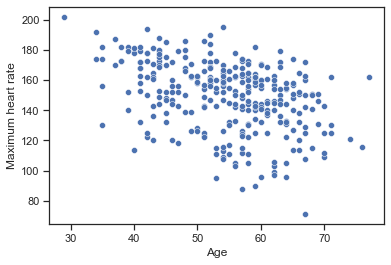

In [14]:
ax = sns.scatterplot(x = df["age"], y = df['max_heart_rate'])
ax.set(xlabel = 'Age', ylabel = 'Maximum heart rate');

<p><a name="pear"></a></p>

## Pearson's correlation

For evaluating if the correlation between two numerical or continuous variables is significant.
It is calculated via a Least-Squares fit.

-  1 = perfect positive relationship
-  0 = absence of linear relationship
- -1 = perfect negative relationship

**Assumes two normally distributed continuos variables**

    



-   $H_0:$ There is not a linear relationship in the population
-   $H_1:$ There is a linear relationship in the population

<AxesSubplot:xlabel='age', ylabel='Count'>

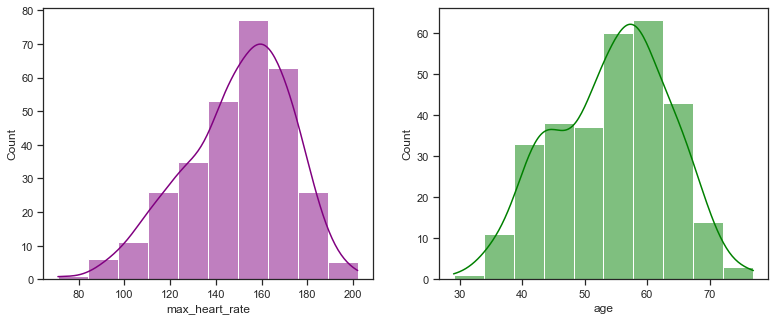

In [15]:
fig, ax = plt.subplots(1,2, figsize=(13,5))
sns.histplot(df['max_heart_rate'], bins = 10, kde = True,
             color = 'purple', ax=ax[0])
sns.histplot(df['age'], bins = 10, kde = True,
             color = 'green', ax=ax[1])

<ipython-input-16-ae3257fe8596>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


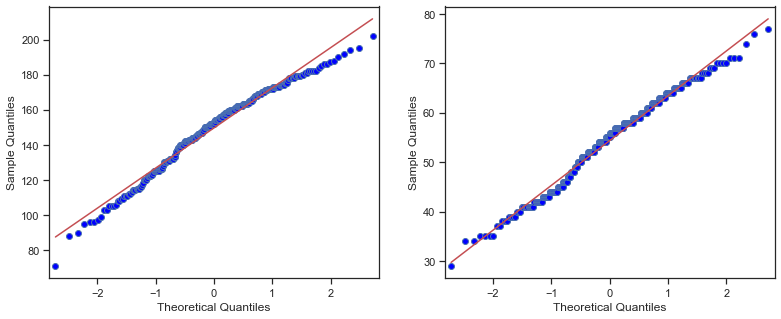

In [16]:
fig, ax = plt.subplots(1,2, figsize=(13,5))
qqplot(df['max_heart_rate'], line = 's', ax = ax[0]) #draw the standardized line with 's' in line argument
qqplot(df['age'], line = 's', ax = ax[1])
fig.show()

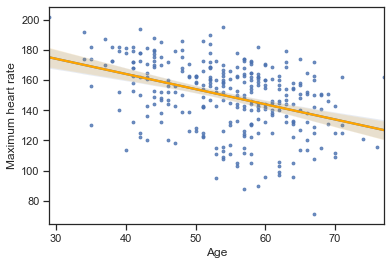

In [17]:
ax = sns.regplot(x = df["age"], y = df['max_heart_rate'], scatter_kws={'s':8})
sns.regplot(x = df["age"], y = df['max_heart_rate'], scatter = False, ci = 95, fit_reg = True, color = 'orange')
ax.set(xlabel = 'Age', ylabel = 'Maximum heart rate');

In [18]:
R, p_value = ss.pearsonr(df['age'], df['max_heart_rate'])
print(f"Pearson's correlation coefficient : {R:.3f}, p-value: {p_value:.5f}")

Pearson's correlation coefficient : -0.399, p-value: 0.00000


The p-value is so small that we reject the null hypothesis and assume that there is a negative relationship between the age of the patients and their maximum heart rate measurement

-------------------
------------------- 



Let's look at an example that's not so well behaved

**Question 4**: is there a linear relationship between the blood pressure and the oldpeak measurement of the patients?

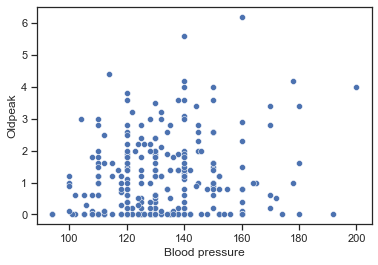

In [19]:
ax = sns.scatterplot(x = df["blood_pressure"], y = df['oldpeak'])
ax.set(xlabel = 'Blood pressure', ylabel = 'Oldpeak');

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

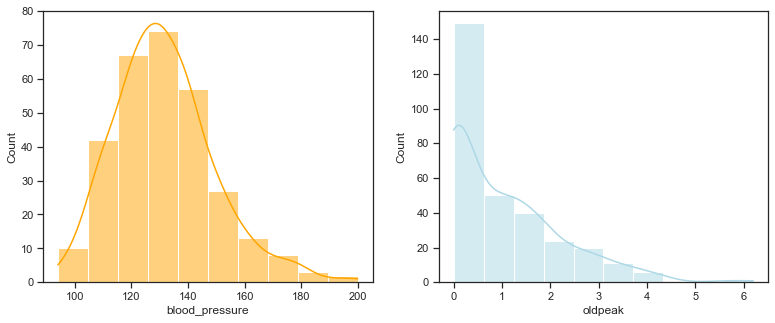

In [20]:
fig, ax = plt.subplots(1,2, figsize=(13,5))
sns.histplot(df['blood_pressure'], bins = 10, kde = True,
             color = 'orange', ax=ax[0])
sns.histplot(df['oldpeak'], bins = 10, kde = True,
             color = 'lightblue', ax=ax[1])

<ipython-input-21-448bded340f0>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


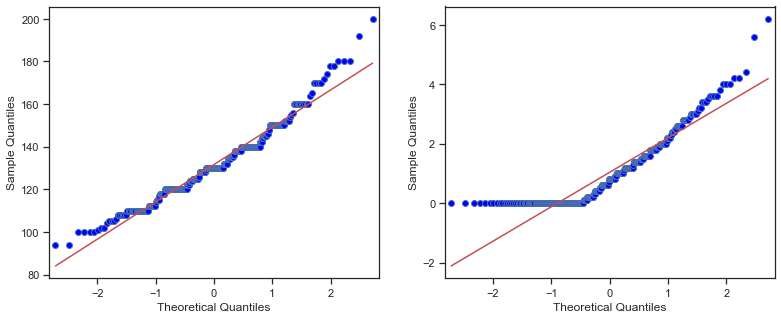

In [21]:
fig, ax = plt.subplots(1,2, figsize=(13,5))
qqplot(df['blood_pressure'], line = 's', ax = ax[0]) #draw the standardized line with 's' in line argument
qqplot(df['oldpeak'], line = 's', ax = ax[1])
fig.show()

<p><a name="spear"></a></p>

## Spearman's correlation

It is the rank-based equivalent of Pearson's correlation coefficient. It does not assume that the data is normally distributed, and it works well to describe non-linear relationships too ([learn more](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)).  Also, its use is not only restricted to continuous data but can also be used in analyses of ordinal variables. 


-   $H_0:$ The ranks of one variable do not covary with the ranks of the other variable
-   $H_1:$ The ranks of one variable do covary with the ranks of the other variable

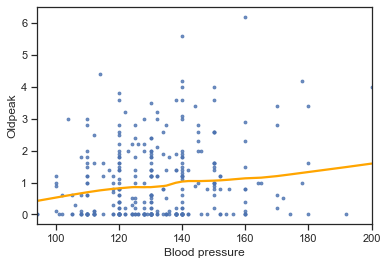

In [22]:
ax = sns.regplot(x = df["blood_pressure"], y = df['oldpeak'], scatter_kws={'s':8}, fit_reg = False)
sns.regplot(x = df["blood_pressure"], y = df['oldpeak'], scatter = False, ci = 95, fit_reg = True, color = 'orange',  
            lowess = True) 
ax.set(xlabel = 'Blood pressure', ylabel = 'Oldpeak');

In the previous plot we set [lowess]( https://mike-langen.medium.com/creating-powerfull-lowess-graphs-in-python-e0ea7a30b17a#:~:text=LOWESS%20stands%20for%20LOcally%2DWeighted,restricting%20yourself%20to%20any%20form.) = True, which estimates a nonparametric lowess model (locally weighted linear regression)
                                              

In [23]:
Rs, p_value = ss.spearmanr(df[["blood_pressure",'oldpeak']])
print(f"Spearman's correlation coefficient : {Rs:.3f}, p-value: {p_value:.5f}")

Spearman's correlation coefficient : 0.154, p-value: 0.00714


The p-value is <0.05, so we reject the null hypothesis and assume that the oldpeak and the blood pressure of the patients covary. When one increases, the other one does so too.